##Estadisitica Aplicada

Sesion 21 - 23 Octubre

Paulina Quiroz Sánchez 1723927

Grupo 41

In [1]:
#basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf, plot_predict

In [6]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.7 MB/s eta 0:00:00


In [7]:
#arima
from statsmodels.tsa.arima.model import ARIMA

##
import pmdarima as pm

In [8]:
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col='Month', parse_dates=True)

In [9]:
pasajeros.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
pasajeros = pasajeros.asfreq('MS')

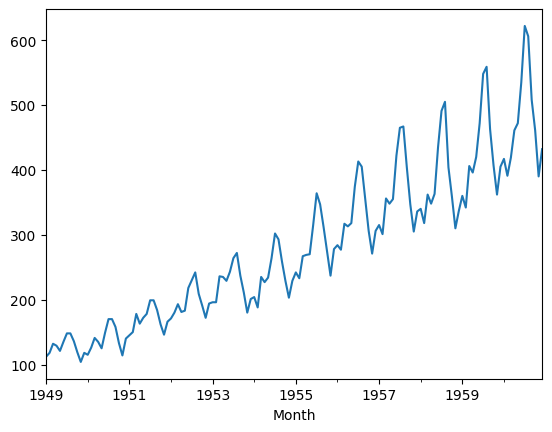

In [11]:
#graficar
pasajeros['Thousands of Passengers'].plot();

In [12]:
#esta serie tiene tendencia positiva y componente estacional.

#Enfoque estocastico
#serie ESTACIONARIA
prueba_dfa = adfuller(pasajeros['Thousands of Passengers'])
pvalue = prueba_dfa[1]
pvalue.round(2)

0.99

In [13]:
#No rechazamos Ho, significa que thousands of passenger es una serie no estacionaria

In [14]:
#Primeras diferencias
pasajeros['1ras_diff']=pasajeros['Thousands of Passengers'].diff()

In [17]:
prueba_dfa1=adfuller(pasajeros['1ras_diff'].dropna())
pvalue1= prueba_dfa1[1]
pvalue1.round(3)

0.054

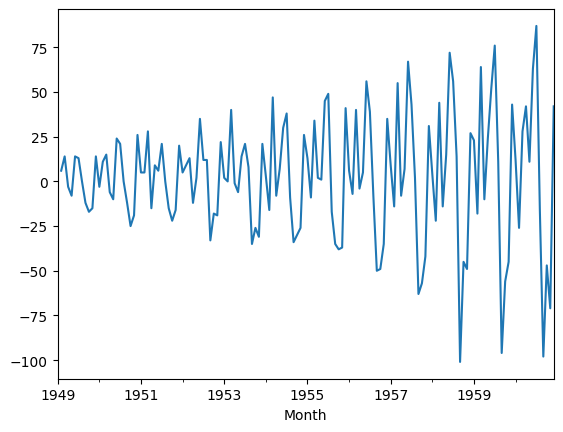

In [18]:
pasajeros['1ras_diff'].plot();

In [20]:
pasajeros['2das_diff']=pasajeros['2das_diff'].diff()

<Axes: xlabel='Month'>

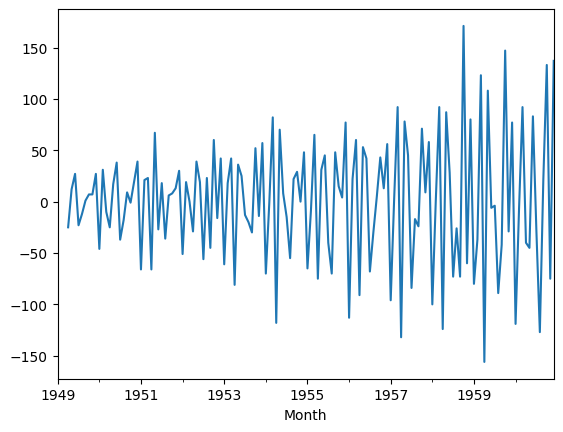

In [21]:
pasajeros['2das_diff'].plot()

In [22]:
prueba_dfa2=adfuller(pasajeros['2das_diff'].dropna())
pvalue2= prueba_dfa2[1]
pvalue2.round(3)

0.0

In [23]:
#Rechazamos Hom significa que las 2das diferencias son estacionarias



*   pasajeros I(2)
*   1eras diferencias I(1)
*   2das diferencias I(0)





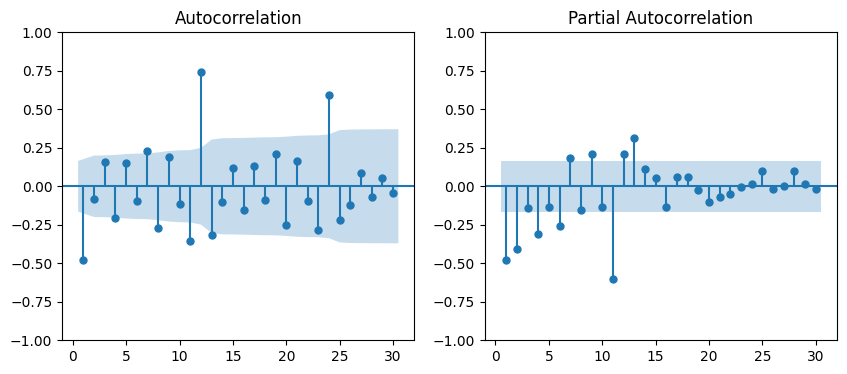

In [25]:
#Graficas de autocorrelacion
ig, ax=plt.subplots(1,2, figsize=(10,4))
plot_acf(pasajeros['2das_diff'].dropna(), zero=False,lags=30, ax=ax[0])
plot_pacf(pasajeros['2das_diff'].dropna(), zero=False, lags=30, ax=ax[1])
plt.show()

Esto nos confirma que es una serie estacional

In [28]:
#determinar el orden
#vamos a utilizar autoarima
pm.auto_arima(pasajeros['Thousands of Passengers'],
              start_p=1, max_p=7,
              start_q=1, max_q=7,
              m=12,
              ic='aic',
              seasonal=True,
              start_P=1, max_P=7,
              stat_Q=1, max_Q=7
              )

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

Autoarima nos siguiere SARIMA (0,1,1)(2,1,0,12)

In [29]:
#Estimar modelo
model=ARIMA(pasajeros['Thousands of Passengers'],
            order=(0,1,1),
            seasonal_order=(2,1,0,12))
results = model.fit()

In [32]:
#pronosticar
results.forecast(start='1961-01-01',end='1963-12-01')

TypeError: ignored

In [33]:
#pronosticar el pasado
pasajeros['pronostico sarima']=results.predict()

<Axes: xlabel='Month'>

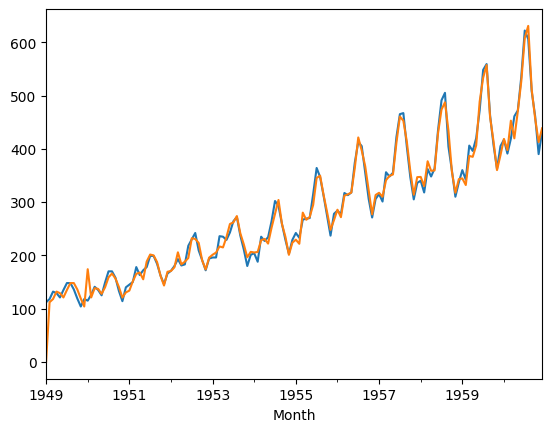

In [34]:
pasajeros['Thousands of Passengers'].plot()
pasajeros['pronostico sarima'].plot()

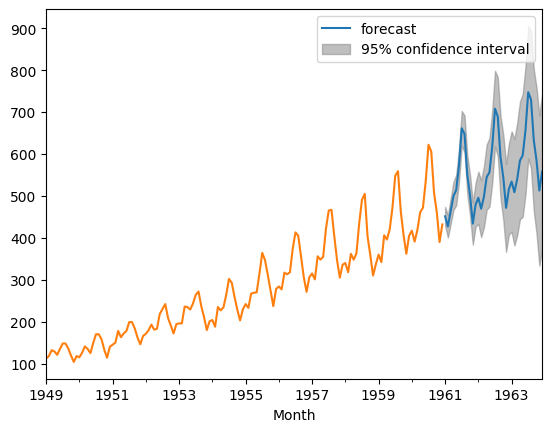

In [35]:
#graficar el pronostico
plot_predict(results,'1961-01-01','1963-12-01')
pasajeros['Thousands of Passengers'].plot();